In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set( style = "darkgrid")

In [2]:
df = pd.read_csv('fortune500.csv')

In [3]:
df.head()

Year  Rank           Company  Revenue (in millions) Profit (in millions)
0  1955     1    General Motors                 9823.5                  806
1  1955     2       Exxon Mobil                 5661.4                584.8
2  1955     3        U.S. Steel                 3250.4                195.4
3  1955     4  General Electric                 2959.1                212.6
4  1955     5            Esmark                 2510.8                 19.1

In [4]:
df.tail()

Year  Rank                Company  Revenue (in millions)  \
25495  2005   496        Wm. Wrigley Jr.                 3648.6   
25496  2005   497         Peabody Energy                 3631.6   
25497  2005   498  Wendy's International                 3630.4   
25498  2005   499     Kindred Healthcare                 3616.6   
25499  2005   500   Cincinnati Financial                 3614.0   

      Profit (in millions)  
25495                  493  
25496                175.4  
25497                 57.8  
25498                 70.6  
25499                  584

In [5]:
df.columns

Index(['Year', 'Rank', 'Company', 'Revenue (in millions)',
       'Profit (in millions)'],
      dtype='object')

In [6]:
df.columns = ['year', 'rank', 'company', 'revenue', 'profit']
df.columns

Index(['year', 'rank', 'company', 'revenue', 'profit'], dtype='object')

In [7]:
len(df)

25500

In [8]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit      object
dtype: object

In [9]:
non_num = df.profit.str.contains('[^0-9.-]')
df.loc[non_num].head()

year  rank                company  revenue profit
228  1955   229                 Norton    135.0   N.A.
290  1955   291        Schlitz Brewing    100.0   N.A.
294  1955   295  Pacific Vegetable Oil     97.9   N.A.
296  1955   297     Liebmann Breweries     96.0   N.A.
352  1955   353     Minneapolis-Moline     77.4   N.A.

In [10]:
set( df.profit[non_num])

{'N.A.'}

In [11]:
len(df[non_num])

369

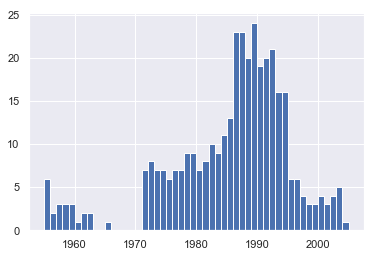

In [12]:
bin_sizes, _, _ = plt.hist(df.year[non_num], bins= range(1955,2006))

In [13]:
df= df.loc[~non_num]
len(df)

25131

In [14]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit      object
dtype: object

In [15]:
df.profit = df.profit.apply(pd.to_numeric)
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit     float64
dtype: object

# plotting with matplotlib

In [16]:
group_by_year = df.loc[:, ['year', 'revenue', 'profit']]
group_by_year.head(10)

year  revenue  profit
0  1955   9823.5   806.0
1  1955   5661.4   584.8
2  1955   3250.4   195.4
3  1955   2959.1   212.6
4  1955   2510.8    19.1
5  1955   2071.6    18.5
6  1955   2056.1     1.6
7  1955   1705.3   182.8
8  1955   1703.6   183.8
9  1955   1687.7   344.4

In [17]:
group_by_year = df.loc[:, ['year', 'revenue', 'profit']].groupby('year')
group_by_year.head()

year   revenue   profit
0      1955    9823.5    806.0
1      1955    5661.4    584.8
2      1955    3250.4    195.4
3      1955    2959.1    212.6
4      1955    2510.8     19.1
500    1956   12443.3   1189.5
501    1956    6272.4    709.3
502    1956    5594.0    437.0
503    1956    4097.7    370.1
504    1956    3466.2    100.1
1000   1957   10796.4    847.4
1001   1957    7126.9    808.5
1002   1957    4647.0    236.6
1003   1957    4228.9    348.1
1004   1957    4090.0    213.8
1500   1958   10989.8    843.6
1501   1958    7830.2    805.2
1502   1958    5771.3    282.8
1503   1958    4413.8    419.4
1504   1958    4335.7    247.9
2000   1959    9522.0    633.6
2001   1959    7543.6    562.5
2002   1959    4130.3     95.7
2003   1959    4120.8    242.9
2004   1959    3472.2    301.6
2500   1960   11233.1    873.1
2501   1960    7910.7    629.8
2502   1960    5356.9    451.4
2503   1960    4349.5    280.2
2504   1960    3643.0    254.6
...     ...       ...      ...
22500  2000  189058.0   6002.0
22501  2000  166809.0   5377.0
22502  2000  163881.0   7910.0
22503  2000  162558.0   7237.0
22504  2000  111630.0  10717.0
23000  2001  210392.0  17720.0
23001  2001  193295.0   6295.0
23002  2001  184632.0   4452.0
23003  2001  180598.0   3467.0
23004  2001  129853.0  12735.0
23500  2002  219812.0   6671.0
23501  2002  191581.0  15320.0
23502  2002  177260.0    601.0
23503  2002  162412.0  -5453.0
23505  2002  125913.0  13684.0
24000  2003  246525.0   8039.0
24001  2003  186763.0   1736.0
24002  2003  182466.0  11460.0
24003  2003  163630.0   -980.0
24004  2003  131698.0  14118.0
24500  2004  258681.0   9054.0
24501  2004  213199.0  21510.0
24502  2004  195645.2   3822.0
24503  2004  164496.0    495.0
24504  2004  134187.0  15002.0
25000  2005  288189.0  10267.0
25001  2005  270772.0  25330.0
25002  2005  193517.0   2805.0
25003  2005  172233.0   3487.0
25004  2005  152363.0  16593.0

[255 rows x 3 columns]

In [18]:
avgs = group_by_year.mean()
avgs

revenue       profit
year                           
1955    275.754453    16.732186
1956    323.604418    22.509237
1957    350.037626    23.181087
1958    377.977264    23.456740
1959    355.229376    19.279276
1960    395.231864    24.019439
1961    410.552410    23.340361
1962    419.556827    23.326104
1963    458.164200    26.965000
1964    490.181600    29.675800
1965    533.858517    34.543287
1966    596.118200    40.023000
1967    665.160800    44.155400
1968    717.771600    42.801200
1969    810.546400    48.387400
1970    889.436400    49.354800
1971    930.380122    43.952535
1972   1013.868699    47.585569
1973   1122.406085    56.448479
1974   1342.981744    78.461460
1975   1674.533401    88.345547
1976   1740.684178    76.774645
1977   1953.818256   100.138742
1978   2190.829532   107.128921
1979   2455.912220   125.347862
1980   2907.460446   158.932049
1981   3322.324797   165.021748
1982   3578.050000   171.926327
1983   3376.060285   125.104684
1984   3417.707566   140.670143
1985   3579.025051   176.473306
1986   3719.951782   145.980294
1987   3550.537945   134.419916
1988   3830.829167   188.693750
1989   4185.644958   241.518908
1990   4445.101040   219.716632
1991   4737.670833   194.674583
1992   4652.094781   114.938622
1993   4840.281612    -0.405165
1994   4845.192769   129.387810
1995   8598.021660   435.736640
1996   9443.810526   493.942105
1997  10178.209677   606.676815
1998  11072.683300   652.375050
1999  11512.835614   672.704628
2000  12701.881250   825.773387
2001  14398.209859   893.058753
2002  14634.109073   415.736694
2003  13995.498990   140.546263
2004  14930.537000   891.185400
2005  16521.448096  1028.991182

In [19]:
x = avgs.index
y1 = avgs.profit
x

Int64Index([1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965,
            1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
            1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
            1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
            1999, 2000, 2001, 2002, 2003, 2004, 2005],
           dtype='int64', name='year')

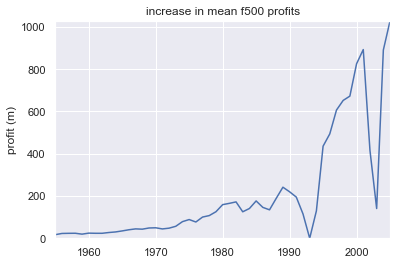

In [21]:
def plot(x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x, y)
    ax.margins(x=0, y=0)
    
fig, ax = plt.subplots()
plot(x, y1, ax, 'increase in mean f500 profits', 'profit (m)')